In [1]:
import matplotlib.pyplot as plt
import mpmath as mp
mp.dps = 120; mp.pretty = True

from neutrinos import UpmnsStandardParametrization, NuOscObservables
Nudata = NuOscObservables

In [2]:
from formfactors_functions import formfactors_neutrino_sum


      ____  __________  __                    
     / __ \/ ____/ __ \/ /   ____  ____  ____ 
    / / / / /   / / / / /   / __ \/ __ \/ __ \
   / /_/ / /___/ /_/ / /___/ /_/ / /_/ / /_/ /
   \___\_\____/_____/_____/\____/\____/ .___/ 
                                     /_/      
   ___git___: 2.1.0 | __authors__: S.C., K.E., G.Z.

--- Calculating H10 Interactions ---

--- Calculating Z1 Interactions ---

--- Defining Lepton Interactions with charged fields ---

Refactored script execution finished.


INFO: --- Creating Diagram: triangle_ni_GLp_GLm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_L^+}}-{{G_L^-}}) coupling found: -\alpha_{13}**2*k_1/\rho_1 + 4*\lambda_{12}*k_1
INFO: Vertex 2 ({{G_L^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*T_{RL}[i, b]/k_1, R=sqrt(2)*conjugate(Q_L[b, i])*m_\ell[b]/k_1
INFO: Vertex 3 ({{G_L^-}}-\overline{\ell}[a]-n[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
INFO: Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}]
INFO: Successfully created triangle_ni_GLp_GLm (FSS)
INFO: --- Creating Diagram: triangle_ni_GRp_GRm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_R^+}}-{{G_R^-}}) coupling found: -\alpha_{13}**2*k_1**3/(\rho_1*v_R**2) + 4*\lambda_{12}*k_1**3/v_R**2
INFO: Vertex 2 ({{G_R^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*conjugate(Q_R[b, i])*m_\ell[b]/v_R, R=sqrt(2)*conjugate(J[b, i])/v_R
INFO: Vertex 3 ({{G_R^-}}-\overline{\ell}[a]-n[i]) coupling found:

28 diagrams created and stored in all_diagrams dictionary.


In [3]:
# Numeric benchmark
k1_val = mp.mpf('246')
vR_val = mp.mpf('5000')
mW1_val = mp.mpf('80.3692')
epsilon_val = k1_val/vR_val
mW2_squared_val = (mW1_val**2/k1_val**2)*(k1_val**2 + vR_val**2)
mW2_val = mp.sqrt(mW2_squared_val)

rho1_val = mp.mpf('0.1')
alpha13_val = mp.mpf('0.1')
alpha12_val = mp.mpf('0.1')
alpha23_val = mp.mpf('0.1') # alpha2 - alpha3 > 0
lamb12_val = mp.mpf('0.1')
#alpha2_3 = mp.mpf('0.2') # alpha2 - alpha3 > 0
mHR_squared_val = (alpha23_val)*(k1_val**2 + vR_val**2)
mHR_val = mp.sqrt(mHR_squared_val)
mH10_val = mp.mpf('125')

d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')
mn1_val = mp.mpf('1e-12')  #GeV 
mn2_val = mp.sqrt(mn1_val**2 + d21)
mn3_val = mp.sqrt(mn1_val**2 + d31)
mn4_val = mp.mpf('1000')
mn5_val = mp.mpf('2000')
mn6_val = mp.mpf('3000')
mn7_val = mn4_val + epsilon_val
mn8_val = mn5_val + epsilon_val
mn9_val = mn6_val + epsilon_val 
mni_vals = [
    mn1_val,
    mn2_val,
    mn3_val,
    mn4_val,
    mn5_val,
    mn6_val,
    mn7_val,
    mn8_val,
    mn9_val
]
me_val = mp.mpf('0.001')
mmu_val = mp.mpf('0.105')
mtau_val = mp.mpf('1.776')
ml_vals = [
    me_val,
    mmu_val,
    mtau_val
]
    


In [4]:
ff = formfactors_neutrino_sum(
    mni_vals, ml_vals, rho1_val, alpha13_val, alpha12_val, 
    alpha23_val, lamb12_val, idx_a=1, idx_b=2, k1_val=k1_val, 
    vR_val=vR_val, mHR_val=mHR_val, verbose=False
)

ALsum = 0
ARsum = 0
for interaction, formfactor in ff.items():
    ffL = formfactor['AL']
    ffR = formfactor['AR']
    print('Diagram: ', interaction)
    print(f'AL = {ffL}')
    print(f'AR = {ffR}')
    ALsum += ffL
    ARsum += ffR
#print('ALsum: ', ALsum)
#print('ARsum: ', ARsum)

Diagram:  ni_GL
AL = (0.0 + 4.03896783473158e-28j)
AR = (0.0 + 6.46234853557053e-27j)
Diagram:  GL_ni
AL = (0.0 + 0.0j)
AR = (0.0 - 6.46234853557053e-27j)
Diagram:  ni_GR
AL = (0.0 + 4.13590306276514e-25j)
AR = (0.0 - 6.61744490042422e-24j)
Diagram:  GR_ni
AL = (0.0 - 4.13590306276514e-25j)
AR = (0.0 + 0.0j)
Diagram:  ni_HR
AL = (0.0 + 0.0j)
AR = (0.0 - 8.470329472543e-22j)
Diagram:  HR_ni
AL = (0.0 + 0.0j)
AR = (0.0 + 8.470329472543e-22j)
Diagram:  ni_W1
AL = (0.0 + 2.11758236813575e-22j)
AR = (0.0 + 0.0j)
Diagram:  W1_ni
AL = (0.0 - 4.2351647362715e-22j)
AR = (0.0 - 1.32348898008484e-23j)
Diagram:  ni_W2
AL = (0.0 + 0.0j)
AR = (0.0 + 0.0j)
Diagram:  W2_ni
AL = (0.0 + 0.0j)
AR = (0.0 + 0.0j)
Diagram:  ni_GLp_GLm
AL = (1.03397576569128e-25 - 1.6940658945086e-21j)
AR = (0.0 + 2.11758236813575e-22j)
Diagram:  ni_GRp_GRm
AL = (-9.4039548065783e-38 + 0.0j)
AR = (5.87747175411144e-39 + 1.0842021724855e-19j)
Diagram:  ni_HRp_HRm
AL = (1.92592994438724e-34 + 2.27373675443232e-13j)
AR = (-4.81

In [5]:
def total_formfactors(formfactors_dict):
    ALsum = 0
    ARsum = 0
    for interaction, formfactor in ff.items():
        ffL = formfactor['AL']
        ffR = formfactor['AR']
        ALsum += ffL
        ARsum += ffR
    return {'AL':ALsum, 'AR':ARsum}

In [20]:
formfactor_results = []
vR_range = mp.linspace(500, 50000, 100)
for vR_val in vR_range:
    epsilon_val = k1_val/vR_val
    mW2_squared_val = (mW1_val**2/k1_val**2)*(k1_val**2 + vR_val**2)
    mW2_val = mp.sqrt(mW2_squared_val)
    mHR_squared_val = (alpha23_val)*(k1_val**2 + vR_val**2)
    mHR_val = mp.sqrt(mHR_squared_val)

    ff = formfactors_neutrino_sum(
        mni_vals, ml_vals, rho1_val, alpha13_val, alpha12_val, 
        alpha23_val, lamb12_val, idx_a=1, idx_b=2, k1_val=k1_val, 
        vR_val=vR_val, mHR_val=mHR_val, verbose=False
    )
    total_ff = total_formfactors(ff)
    formfactor_results.append(total_ff)

In [15]:
#formfactor_results

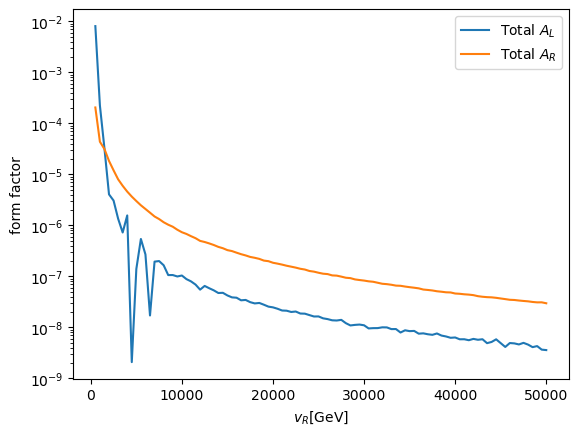

In [21]:
AL_resuls = [abs(formfactor['AL']) for formfactor in formfactor_results]
AR_resuls = [abs(formfactor['AR']) for formfactor in formfactor_results]
plt.semilogy(vR_range, AL_resuls, label='Total $A_L$')
plt.semilogy(vR_range, AR_resuls, label='Total $A_R$')
plt.ylabel('form factor')
plt.xlabel('$v_R$[GeV]')
plt.legend()

In [24]:
from LFVXD.Hdecay_diagrams_v2 import calculate_decay_width, calculate_branching_ratio

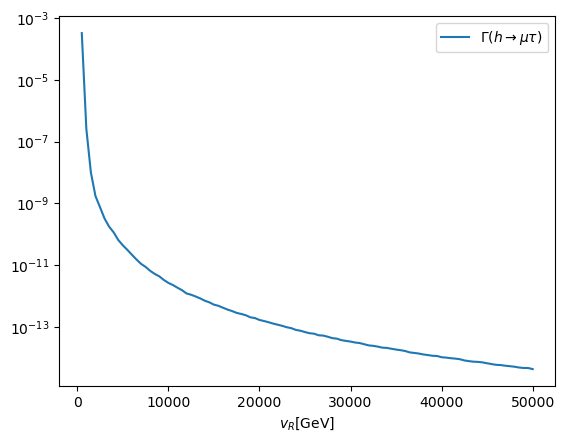

In [23]:
Hwidth_resulta = [calculate_decay_width(AL, AR, mH10_val, ml_vals[1], ml_vals[2]) for AL, AR in zip(AL_resuls, AR_resuls)]
plt.semilogy(vR_range, Hwidth_resulta, label=r'$\Gamma(h \to \mu \tau)$')
plt.xlabel('$v_R$[GeV]')
plt.legend()

INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol r from STIXGeneral
INFO: Substituting symbol B from STIXNonUnicode
INFO: Substituting symbol r from STIXGeneral


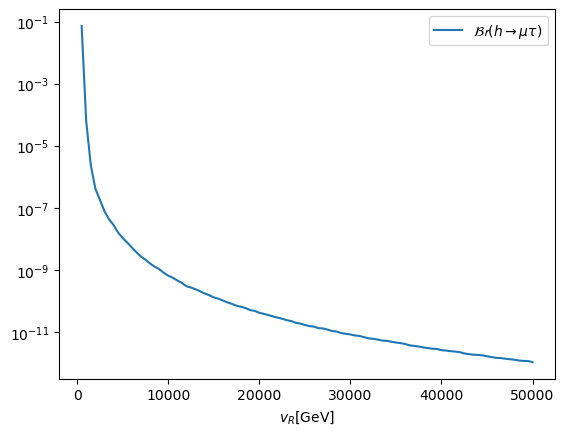

In [26]:
HBr_resulta = [calculate_branching_ratio(AL, AR, mH10_val, ml_vals[1], ml_vals[2]) for AL, AR in zip(AL_resuls, AR_resuls)]
plt.semilogy(vR_range, HBr_resulta, label=r'$\mathcal{Br}(h \to \mu \tau)$');
plt.xlabel('$v_R$[GeV]');
plt.legend()